## Matplotlib

Pour reprendre les termes de ses développeurs : *"matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. matplotlib can be used in python scripts, the python and ipython shell (ala MatLab or mathematica), web application servers, and six graphical user interface toolkits."*


La structure sous-jacente de matplotlib est très générale et personnalisable (gestion de l'interface utilisateur, possibilité d'intégration dans des applications web, etc.). Heureusement, il n'est pas nécessaire de maîtriser l'ensemble de ces méthodes pour produire un graphe (il existe pas moins de 2840 pages de [documentation](http://matplotlib.org/Matplotlib.pdf)). Pour générer des graphes et les modifier, il suffit de passer par l'interface [pyplot](). 

L'interface pyplot est inspirée de celle de MATLAB. Ceux qui la connaissent s'y retrouveront rapidement. 

Pour résumer : 
- matplotlib - accès "low level" à la librairie de visualisation. Utile si vous souhaitez créer votre propre librairie de visualisation python ou faire des choses très custom.
- matplotlib.pyplot - interface proche de celle de Matplab pour produire vos graphes
- pylab - matplotlib.pyplot + numpy

In [6]:
#Pour intégrer les graphes à votre notebook, il suffit de faire
%matplotlib inline

La structure des objets décrits par l'API est très hiérarchique, comme illustré par ce schéma :
- "Figure" contient l'ensemble de la représentation visuelle. C'est par exemple grâce à cette méta-structure que l'on peut facilement ajouter un titre à une représentation qui contiendrait plusieurs graphes ;
- "Axes" (ou "Subplots") décrit l'ensemble contenant un ou pusieurs graphes (correspond à l'objet subplot et aux méthodes add_subplot)
- "Axis" correspond aux axes d'un graphique (ou instance de subplot) donné. 

<img src="http://matplotlib.org/_images/fig_map.png" />

Une dernière remarque d'ordre général : [pyplot est une machine à état](https://en.wikipedia.org/wiki/Matplotlib).
Cela implique que les méthodes pour tracer un graphe ou éditer un label s'appliquent par défaut au dernier état en cours (dernière instance de subplot ou dernière instance d'axe par exemple). 

Conséquence : il faut concevoir ses codes comme une séquence d'instructions (par exemple, il ne faut pas séparer les instructions qui se rapportent au même graphique dans deux cellules différentes du Notebook).

### Synthèse des fonctions

<img src="https://matplotlib.org/_images/anatomy.png" />

### Figures et Subplots 

<Axes: >

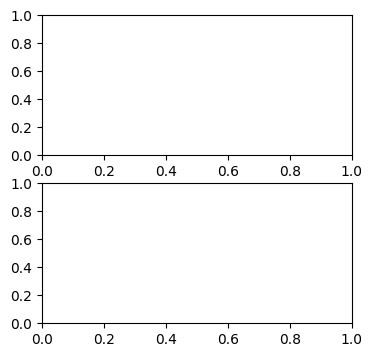

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(4,4))
plt.subplot(2,1,1) #Méthode subplot : pour définir les graphiques appartenant à l'objet figure, ici 1 X 1, indice 1
plt.subplot(2,1,2)

#attention, il est nécessaire de conserver toutes les instructions d'un même graphique dans le même bloc 
#pas besoin de plt.show() dans un notebook, sinon c'est nécessaire

Un graphique (très) simple avec l'instruction plot.

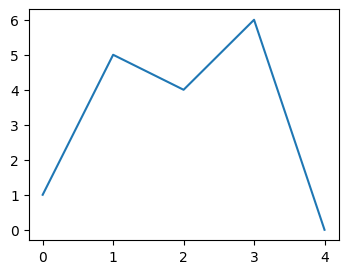

In [8]:
from numpy import random
import numpy as np
import pandas as p

plt.figure(figsize=(4,3))
plt.subplot(1,1,1)
plt.plot([1,5,4,6,0])
#Il est possible de passer des listes, des arrays de numpy, des Series et des Dataframes de pandas
#plt.plot(np.array([random.random_sample(1) for i in range(5)]))
#plt.plot(p.DataFrame(np.array([random.random_sample(1) for i in range(5)])))
#pour afficher plusieurs courbes, il suffit de cumuler les instructions plt.plot
#plt.show()

Pour faire plusieurs sous graphes, il suffit de modifier les valeurs des paramètres de l'objet subplot.

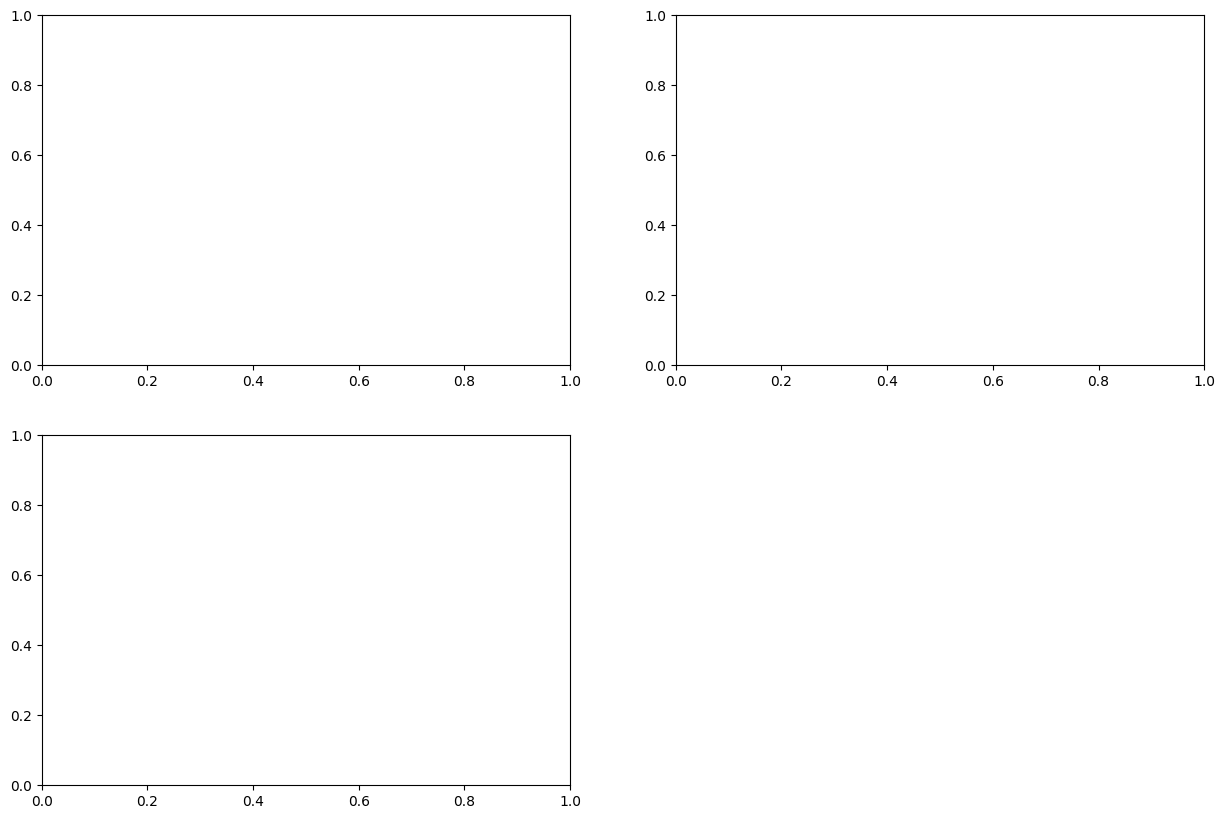

In [9]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1) #modifie l'objet fig et créé une nouvelle instance de subplot, appelée ax1
#vous verrez souvent la convention ax comme instance de subplot : c'est parce que l'on parle aussi d'objet "Axe"
#à ne pas confondre avec l'objet "Axis"
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

Si aucune instance d'axes n'est précisée, la méthode plot est appliquée à la dernière instance créée.

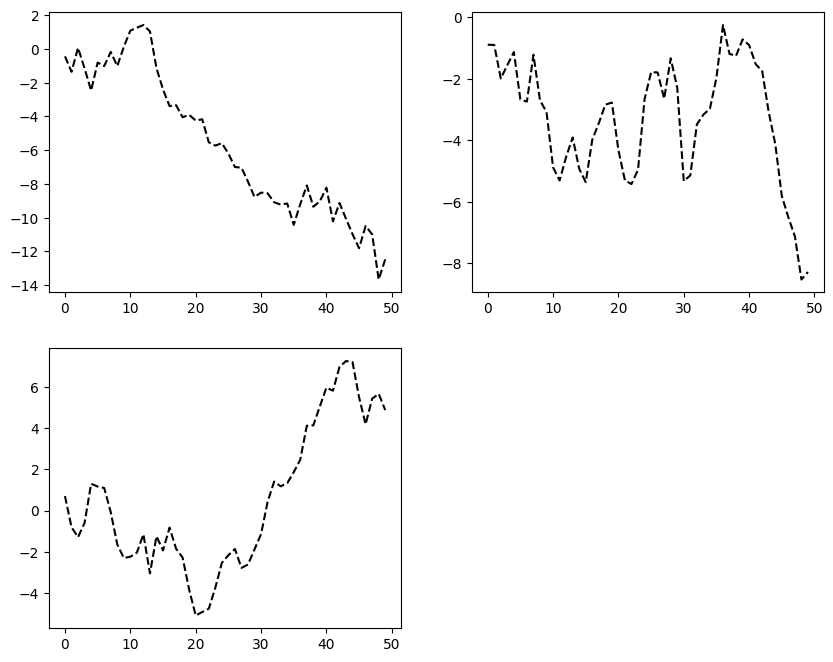

In [10]:
from numpy.random import randn

fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2,2,1)
plt.plot(randn(50).cumsum(),'k--')
ax2 = fig.add_subplot(2,2,2)
plt.plot(randn(50).cumsum(),'k--')
ax3 = fig.add_subplot(2,2,3)
plt.plot(randn(50).cumsum(),'k--')
# plt.show()

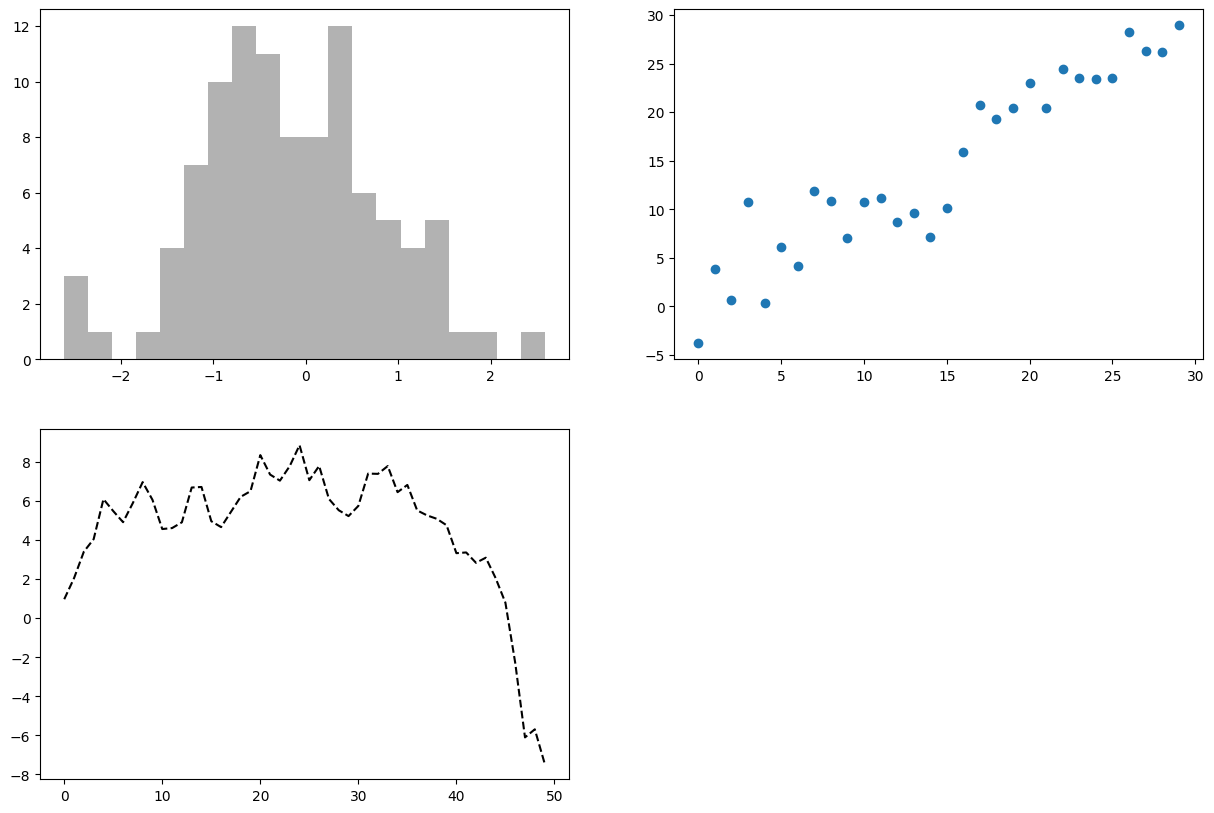

In [11]:
from numpy.random import randn

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

# On peut compléter les instances de sous graphiques par leur contenu.
# Au passage, quelques autres exemples de graphes
ax1.hist(randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*randn(30))
ax3.plot(randn(50).cumsum(),'k--')

Pour explorer l'ensemble des catégories de graphiques possibles : [Gallery](http://matplotlib.org/gallery.html). Les plus utiles pour l'analyse de données : [scatter](http://matplotlib.org/examples/lines_bars_and_markers/scatter_with_legend.html), [scatterhist](http://matplotlib.org/examples/axes_grid/scatter_hist.html), [barchart](http://matplotlib.org/examples/pylab_examples/barchart_demo.html), [stackplot](http://matplotlib.org/examples/pylab_examples/stackplot_demo.html), [histogram](http://matplotlib.org/examples/statistics/histogram_demo_features.html), [cumulative distribution function](http://matplotlib.org/examples/statistics/histogram_demo_cumulative.html), [boxplot](http://matplotlib.org/examples/statistics/boxplot_vs_violin_demo.html), , [radarchart](http://matplotlib.org/examples/api/radar_chart.html).

### Couleurs, Marqueurs et styles de ligne

MatplotLib offre la possibilité d'adopter deux types d'écriture : chaîne de caractère condensée ou paramétrage explicite via un système clé-valeur.

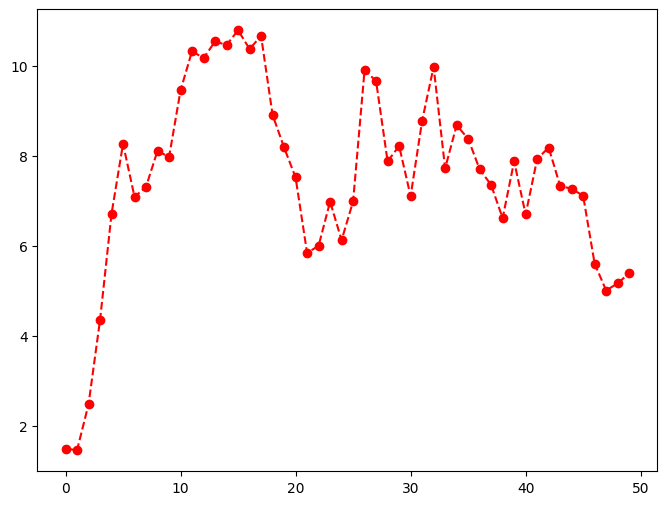

In [12]:
from numpy.random import randn

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(randn(50).cumsum(),color='r',marker='o',linestyle='dashed')
# plt.show()

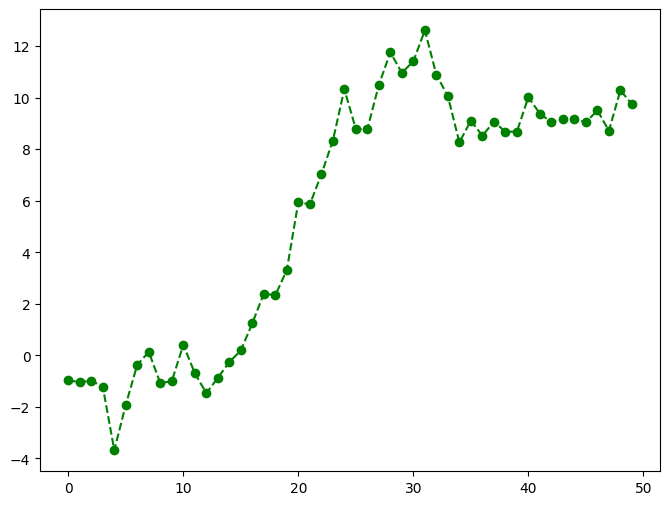

In [16]:
from numpy.random import randn

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(randn(50).cumsum(), 'og--') #l'ordre des paramètres n'importe pas

Plus de détails dans la documentation sur l'API de matplotlib pour paramétrer la
<a href="http://matplotlib.org/api/colors_api.html">
couleur
</a>
, les
<a href="http://matplotlib.org/api/markers_api.html">
markers
</a>
, et le
<a href="http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle">
style des lignes
</a>
. MatplotLib est compatible avec plusieurs standards de couleur :
- sous forme d'une lettre : 'b' = blue (bleu), 'g' = green (vert), 'r' = red (rouge), 'c' = cyan (cyan), 'm' = magenta (magenta), 'y' = yellow (jaune), 'k' = black (noir), 'w' = white (blanc).
- sous forme d'un nombre entre 0 et 1 entre quotes qui indique le niveau de gris : par exemple '0.70' ('1' = blanc, '0' = noir).
- sous forme d'un nom : par exemple 'red'.
- sous forme html avec les niveaux respectifs de rouge (R), vert (G) et bleu (B) : '#ffee00'. Voici un site pratique pour récupérer une couleur en [RGB hexadécimal](http://www.proftnj.com/RGB3.htm). 
- sous forme d'un triplet de valeurs entre 0 et 1 avec les niveaux de R, G et B : (0.2, 0.9, 0.1).

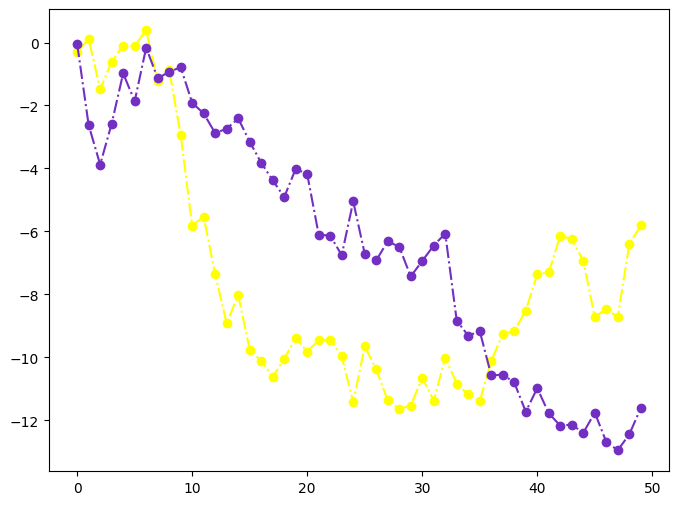

In [17]:
from numpy.random import randn

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)
#avec la norme RGB
ax1.plot(randn(50).cumsum(),color='yellow',marker='o',linestyle='-.')
ax1.plot(randn(50).cumsum(),color=(0.45, 0.18, 0.76), marker='o',linestyle='-.')

### Ticks labels et legendes 

3 méthodes clés : 
- xlim() : pour délimiter l'étendue des valeurs de l'axe
- xticks() : pour passer les graduations sur l'axe
- xticklabels() : pour passer les labels

Pour l'axe des ordonnées c'est ylim, yticks, yticklabels.

Pour récupérer les valeurs fixées : 
- plt.xlim() ou plt.get_xlim()
- plt.xticks() ou plt.get_xticks()
- plt.xticklabels() ou plt.get_xticklabels()
    
Pour fixer ces valeurs :
- plt.xlim([start,end]) ou plt.set_xlim([start,end])
- plt.xticks(my_ticks_list) ou plt.get_xticks(my_ticks_list)
- plt.xticklabels(my_labels_list) ou plt.get_xticklabels(my_labels_list)

Si vous voulez customiser les axes de plusieurs sous graphiques, passez par une [instance de axis](http://matplotlib.org/users/artists.html) et non subplot.

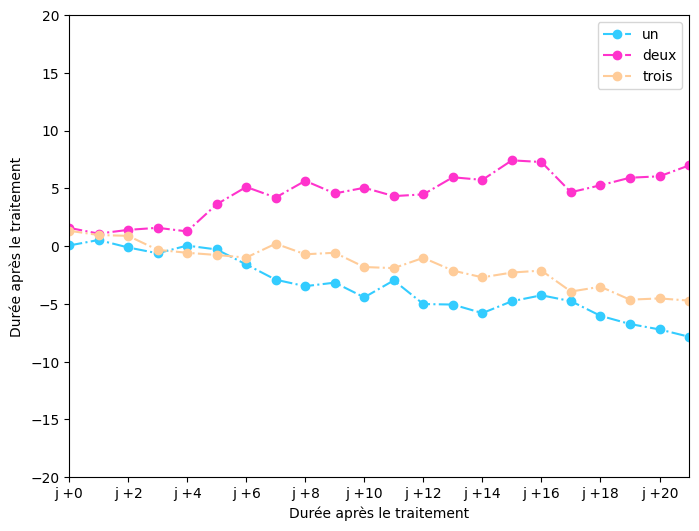

In [18]:
from numpy.random import randn

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)

serie1=randn(50).cumsum()
serie2=randn(50).cumsum()
serie3=randn(50).cumsum()
ax1.plot(serie1,color='#33CCFF',marker='o',linestyle='-.',label='un')
ax1.plot(serie2,color='#FF33CC',marker='o',linestyle='-.',label='deux')
ax1.plot(serie3,color='#FFCC99',marker='o',linestyle='-.',label='trois')

#sur le graphe précédent, pour raccourcir le range
ax1.set_xlim([0,21])
ax1.set_ylim([-20,20])
#faire un ticks avec un pas de 2 (au lieu de 5)
ax1.set_xticks(range(0,21,2))
#changer le label sur la graduation
ax1.set_xticklabels(["j +" + str(l) for l in range(0,21,2)])
ax1.set_xlabel('Durée après le traitement')
ax1.set_ylabel('Durée après le traitement')

ax1.legend()
#permet de choisir l'endroit le plus vide

### Inclusion d'annotation et de texte, titre et libellé des axes 

Text(5, -10, '$\\mu=100,\\ \\sigma=15$')

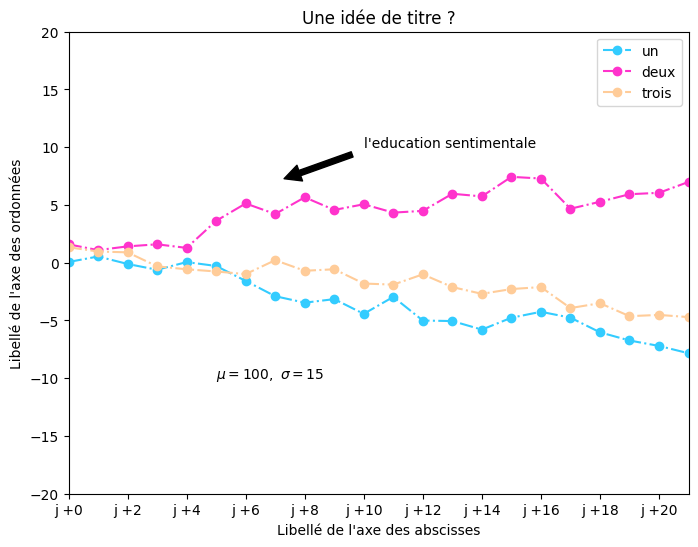

In [19]:
from numpy.random import randn

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(serie1,color='#33CCFF',marker='o',linestyle='-.',label='un')
ax1.plot(serie2,color='#FF33CC',marker='o',linestyle='-.',label='deux')
ax1.plot(serie3,color='#FFCC99',marker='o',linestyle='-.',label='trois')

ax1.set_xlim([0,21])
ax1.set_ylim([-20,20])
ax1.set_xticks(range(0,21,2))
ax1.set_xticklabels(["j +" + str(l) for l in range(0,21,2)])
ax1.set_xlabel('Durée après le traitement')

ax1.annotate("l'education sentimentale", xy=(7, 7), #point de départ de la flèche
             xytext=(10, 10),          #position du texte
            arrowprops=dict(facecolor='#000000', shrink=0.10),
            )

ax1.legend(loc='best')

plt.xlabel("Libellé de l'axe des abscisses")
plt.ylabel("Libellé de l'axe des ordonnées")
plt.title("Une idée de titre ?")
plt.text(5, -10, r'$\mu=100,\ \sigma=15$')

# plt.show()

### matplotlib et le style

Il est possible de définir son propre style. Cette possibilité est intéressante si vous faîtes régulièrement les mêmes graphes et voulez définir des templates (plutôt que de copier/coller toujours les mêmes lignes de code). Tout est décrit dans [style_sheets](http://matplotlib.org/users/style_sheets.html).

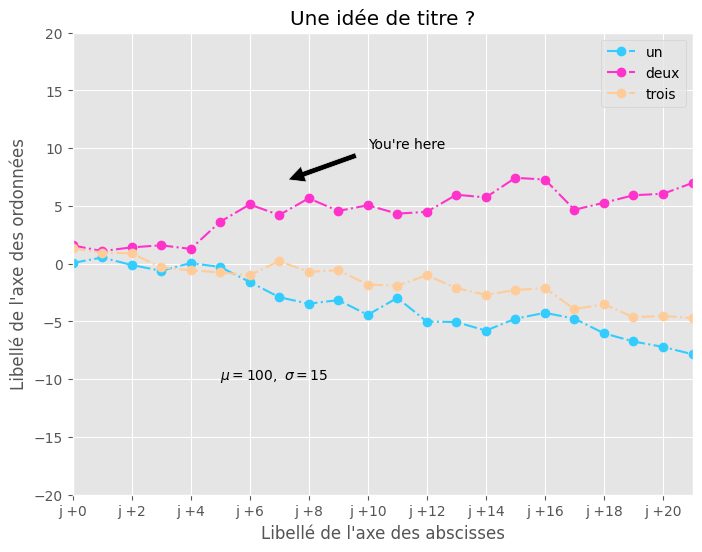

In [22]:
from numpy.random import randn

#pour que la définition du style soit seulement dans cette cellule notebook
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(8,6))
    ax1 = fig.add_subplot(1,1,1)
    ax1.plot(serie1,color='#33CCFF',marker='o',linestyle='-.',label='un')
    ax1.plot(serie2,color='#FF33CC',marker='o',linestyle='-.',label='deux')
    ax1.plot(serie3,color='#FFCC99',marker='o',linestyle='-.',label='trois')

    ax1.set_xlim([0,21])
    ax1.set_ylim([-20,20])
    ax1.set_xticks(range(0,21,2))
    ax1.set_xticklabels(["j +" + str(l) for l in range(0,21,2)])
    ax1.set_xlabel('Durée après le traitement')

    ax1.annotate("You're here", xy=(7, 7), #point de départ de la flèche
                 xytext=(10, 10),          #position du texte
                arrowprops=dict(facecolor='#000000', shrink=0.10),
                )

    ax1.legend(loc='best')

    plt.xlabel("Libellé de l'axe des abscisses")
    plt.ylabel("Libellé de l'axe des ordonnées")
    plt.title("Une idée de titre ?")
    plt.text(5, -10, r'$\mu=100,\ \sigma=15$')

    #plt.show()

De nombreux autres styles sont disponibles, pick up your choice!  ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


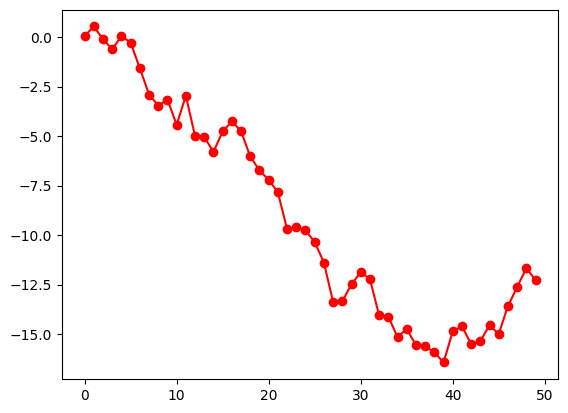

In [25]:
import numpy as np
import matplotlib.pyplot as plt

print("De nombreux autres styles sont disponibles, pick up your choice! ", plt.style.available)
with plt.style.context('tableau-colorblind10'):
    plt.plot(serie1, 'r-o')

# plt.show()